<a href="https://colab.research.google.com/github/Mitul-Agarwal/Parameter-Optimization-of-SVM/blob/main/Parameter_Optimization_of_SVM_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn seaborn

Data Summary:
             letter         x-box         y-box         width         high  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.00000   
mean      12.516750      4.023550      7.035500      5.121850      5.37245   
std        7.502175      1.913212      3.304555      2.014573      2.26139   
min        0.000000      0.000000      0.000000      0.000000      0.00000   
25%        6.000000      3.000000      5.000000      4.000000      4.00000   
50%       13.000000      4.000000      7.000000      5.000000      6.00000   
75%       19.000000      5.000000      9.000000      6.000000      7.00000   
max       25.000000     15.000000     15.000000     15.000000     15.00000   

              onpix         x-bar         y-bar         x2bar         y2bar  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       3.505850      6.897600      7.500450      4.628600      5.178650   
std        2.190458      2.026035      2.32535

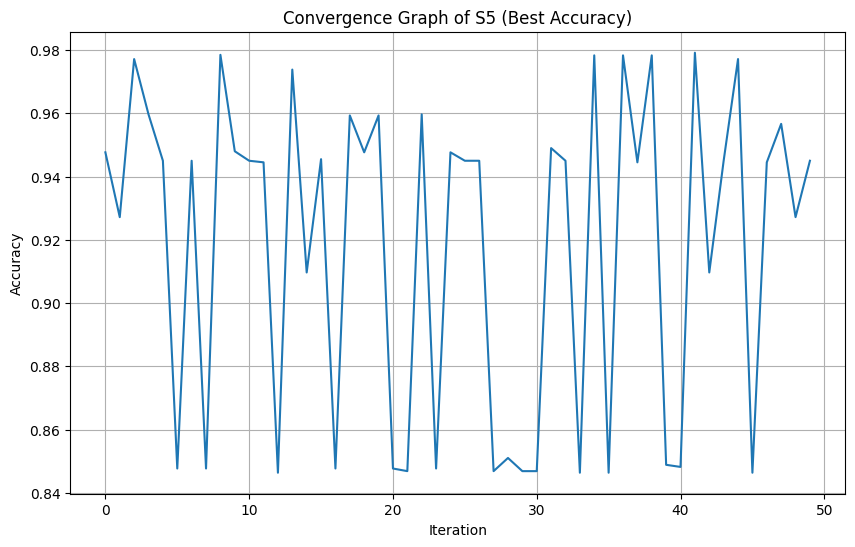

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import random

# 1. Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
column_names = ['letter', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar',
                'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']
data = pd.read_csv(url, names=column_names)

# 2. Encode labels
le = LabelEncoder()
data['letter'] = le.fit_transform(data['letter'])

# 3. Data analytics
print("Data Summary:")
print(data.describe())
print("\nClass Distribution:")
print(data['letter'].value_counts())

X = data.drop('letter', axis=1)
y = data['letter']

# 4. Define parameter space
kernels = ['linear', 'rbf', 'poly']
Cs = np.linspace(0.1, 10, 10)
gammas = ['scale', 'auto']

results = []
convergence_history = {}

# 5. Run 10 samples
for i in range(1, 11):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

    best_acc = 0
    best_params = {}
    history = []

    for iteration in range(50):
        kernel = random.choice(kernels)
        C = random.choice(Cs)
        gamma = random.choice(gammas)

        clf = SVC(kernel=kernel, C=C, gamma=gamma)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)

        history.append(acc)

        if acc > best_acc:
            best_acc = acc
            best_params = {'kernel': kernel, 'C': C, 'gamma': gamma}

    results.append([f"S{i}", best_acc, best_params])
    convergence_history[f"S{i}"] = history

# 6. Create result table
df_result = pd.DataFrame(results, columns=["Sample", "Best Accuracy", "Best SVM Parameters"])
print("\nFinal Result Table:")
print(df_result)

# 7. Save to CSV
df_result.to_csv("svm_results.csv", index=False)

# 8. Plot convergence for best sample
best_sample = df_result.loc[df_result["Best Accuracy"].idxmax(), "Sample"]
plt.figure(figsize=(10, 6))
plt.plot(convergence_history[best_sample])
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title(f"Convergence Graph of {best_sample} (Best Accuracy)")
plt.grid(True)
plt.savefig("convergence_plot.png")
plt.show()